## Import libraries

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import ETFs as etfs

Total number of ETFs: 33


## Prepare the data

In [3]:
tickers = etfs.etfs
today = pd.Timestamp.today().strftime('%Y-%m-%d')

start_date = "2012-01-01"
end_date = "2025-3-31"

data_download = yf.download(tickers=tickers, start = start_date, end = end_date)
data_long = data_download.stack(level=1).reset_index()
display(data_long)


C:\Users\Shelly\AppData\Local\Temp\ipykernel_23448\1323271818.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_download = yf.download(tickers=tickers, start = start_date, end = end_date)
[*********************100%***********************]  33 of 33 completed
C:\Users\Shelly\AppData\Local\Temp\ipykernel_23448\1323271818.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_long = data_download.stack(level=1).reset_index()


Price,Date,Ticker,Close,High,Low,Open,Volume
0,2012-01-03,CORN,42.619999,42.990002,42.180000,42.730000,114100.0
1,2012-01-03,DBO,26.042212,26.094875,25.770116,25.796447,318300.0
2,2012-01-03,EWA,12.307330,12.368644,12.234869,12.240442,2787500.0
3,2012-01-03,EWC,20.625574,20.648157,20.384692,20.437385,6790400.0
4,2012-01-03,EWG,14.720881,14.838238,14.706212,14.742886,3892700.0
...,...,...,...,...,...,...,...
100493,2025-03-28,VDNR.L,136.095001,138.505005,136.065002,137.910004,31820.0
100494,2025-03-28,VGK,70.980003,71.260002,70.820000,71.190002,6081100.0
100495,2025-03-28,VNQ,89.709999,90.279999,89.129997,90.120003,3602900.0
100496,2025-03-28,VPL,73.000000,73.500000,72.830002,73.279999,419300.0


## Reset the index

In [4]:
data = data_long.copy()
print(data.columns.tolist())
data.set_index('Date', inplace=True)
display(data)
data.to_csv("assets_original.csv", index=False)

['Date', 'Ticker', 'Close', 'High', 'Low', 'Open', 'Volume']


Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-03,CORN,42.619999,42.990002,42.180000,42.730000,114100.0
2012-01-03,DBO,26.042212,26.094875,25.770116,25.796447,318300.0
2012-01-03,EWA,12.307330,12.368644,12.234869,12.240442,2787500.0
2012-01-03,EWC,20.625574,20.648157,20.384692,20.437385,6790400.0
2012-01-03,EWG,14.720881,14.838238,14.706212,14.742886,3892700.0
...,...,...,...,...,...,...
2025-03-28,VDNR.L,136.095001,138.505005,136.065002,137.910004,31820.0
2025-03-28,VGK,70.980003,71.260002,70.820000,71.190002,6081100.0
2025-03-28,VNQ,89.709999,90.279999,89.129997,90.120003,3602900.0


## Prepare the data with only the name and Close price 

Price,Ticker,Close
Date,,
2012-01-03,CORN,42.619999
2012-01-03,DBO,26.042212
2012-01-03,EWA,12.307330
2012-01-03,EWC,20.625574
2012-01-03,EWG,14.720881
...,...,...
2025-03-28,VDNR.L,136.095001
2025-03-28,VGK,70.980003
2025-03-28,VNQ,89.709999


<Axes: xlabel='Date'>

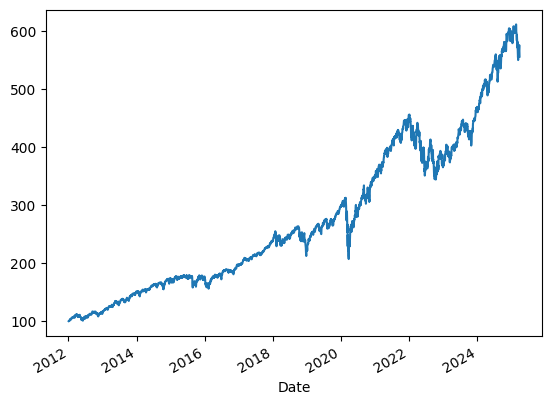

In [5]:
data_close = data[['Ticker', 'Close']].copy()
display(data_close)

# Take one ETF for checking
data_close[data_close['Ticker'] == 'SPY']['Close'].plot()

## Change the dataframe pivot as the columns are each ticker's closing prices

In [6]:
close_wide = data_close.pivot(columns='Ticker', values='Close')
display(close_wide)
close_wide.to_csv('assets_wide_NAN.csv', index=True)

Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,42.619999,26.042212,NaN,NaN,12.307330,20.625574,14.720881,...,28.830000,100.450684,83.888573,317.519989,69.905655,NaN,27.664722,34.591938,33.707809,6.78375
2012-01-04,NaN,NaN,NaN,42.509998,26.165096,NaN,NaN,12.452251,20.587934,14.581520,...,28.389999,100.608261,82.891136,318.160004,70.114944,NaN,27.328695,34.000530,33.888020,6.69750
2012-01-05,NaN,NaN,NaN,41.509998,25.814005,NaN,NaN,12.290605,20.459967,14.412823,...,28.510000,100.876129,82.743668,313.359985,69.817871,NaN,26.831099,34.319885,33.472149,6.68250
2012-01-06,NaN,NaN,NaN,41.349998,25.919331,NaN,NaN,12.128960,20.249193,14.148770,...,27.910000,100.616127,83.396919,313.760010,69.392532,NaN,26.462753,34.207520,33.070118,6.72625
2012-01-09,NaN,NaN,NaN,42.189999,25.831558,NaN,NaN,12.167979,20.309414,14.207450,...,28.129999,100.860359,83.249390,312.640015,69.655830,NaN,26.663073,34.089233,33.097832,6.69625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,38.276001,10.405,100.550003,18.930000,14.140000,107.930000,56.490002,23.700001,41.509998,38.029999,...,29.959999,574.080017,88.790054,74.879997,129.030991,140.270004,71.730003,90.728004,74.690002,8.28750
2025-03-25,38.380001,10.440,100.720001,18.770000,14.030000,107.330002,56.580002,23.809999,41.709999,38.380001,...,30.580000,575.460022,88.780167,74.820000,129.460007,140.479996,72.160004,89.709999,75.089996,8.14875
2025-03-26,37.854000,10.400,98.169998,18.559999,14.110000,105.839996,56.080002,23.709999,41.380001,37.560001,...,30.530001,568.590027,88.196609,75.419998,130.250000,139.595001,71.139999,90.059998,74.410004,8.14500


In [7]:
data_fill_minus_one = close_wide.copy()
data_fill_minus_one.fillna(-1, inplace=True)
data_fill_minus_one.to_csv('assets_wide_fill_minus_one.csv', index=True)

In [13]:
close_fill = close_wide.ffill().bfill()
close_fill = close_fill.dropna()
close_fill.to_csv('assets_filled.csv', index=True)

In [16]:
target_binary = (close_wide > close_wide.shift(1)).astype(int)
display(target_binary)
target_binary.to_csv('target_binary.csv', index=True)

Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-04,0,0,0,0,1,0,0,1,0,0,...,0,1,0,1,1,0,0,0,1,0
2012-01-05,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
2012-01-06,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2012-01-09,0,0,0,1,0,0,0,1,1,1,...,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,1,1,1,1,1,0,1,1,1,0,...,0,1,0,1,1,1,0,1,1,0
2025-03-25,1,1,1,0,0,0,1,1,1,1,...,1,1,0,0,1,1,1,0,1,0
2025-03-26,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [15]:
test_df = pd.DataFrame({'Close_yesterday': close_wide['SPY'].shift(1),'Close Tody':close_wide['SPY'],'Target': target_binary['SPY']})
display(test_df)

,Close_yesterday,Close Tody,Target
Date,,,
2012-01-03,NaN,100.450684,0
2012-01-04,100.450684,100.608261,1
2012-01-05,100.608261,100.876129,1
2012-01-06,100.876129,100.616127,0
2012-01-09,100.616127,100.860359,1
...,...,...,...
2025-03-24,563.979980,574.080017,1
2025-03-25,574.080017,575.460022,1
2025-03-26,575.460022,568.590027,0


In [18]:
first_prices = close_wide.apply(
    lambda col: col[col != -1].iloc[0] if (col != -1).any() else np.nan
)
fp_df = pd.DataFrame(first_prices.values, index=close_wide.columns, columns=['First Price'])
display(fp_df.T)

normalized_close = close_wide/ first_prices
# normalized_close = normalized_close.mask(close_wide < 0, -1) 
normalized_array = normalized_close.to_numpy(dtype='float32')
print(f"normalized_array.shape {normalized_array.shape}")
display(normalized_close)
normalized_close.to_csv('assets_normalized.csv', index=True)

Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
First Price,21.902443,6.246624,40.0,42.619999,26.042212,22.380077,42.757008,12.30733,20.625574,14.720881,...,28.83,100.450684,83.888573,317.519989,69.905655,42.300957,27.664722,34.591938,33.707809,6.78375


normalized_array.shape (3408, 33)


Ticker,AIEQ,ASHR.L,BCHN.L,CORN,DBO,EDEN,EMXC,EWA,EWC,EWG,...,SLV,SPY,TLT,USO,VDE,VDNR.L,VGK,VNQ,VPL,XMAF.L
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-01-04,1.000000,1.000000,1.000000,0.997419,1.004719,1.000000,1.000000,1.011775,0.998175,0.990533,...,0.984738,1.001569,0.988110,1.002016,1.002994,1.000000,0.987854,0.982903,1.005346,0.987286
2012-01-05,1.000000,1.000000,1.000000,0.973956,0.991237,1.000000,1.000000,0.998641,0.991971,0.979073,...,0.988900,1.004235,0.986352,0.986898,0.998744,1.000000,0.969867,0.992135,0.993009,0.985075
2012-01-06,1.000000,1.000000,1.000000,0.970202,0.995281,1.000000,1.000000,0.985507,0.981752,0.961136,...,0.968089,1.001647,0.994139,0.988158,0.992660,1.000000,0.956552,0.988887,0.981082,0.991524
2012-01-09,1.000000,1.000000,1.000000,0.989911,0.991911,1.000000,1.000000,0.988677,0.984671,0.965122,...,0.975720,1.004078,0.992381,0.984631,0.996426,1.000000,0.963793,0.985468,0.981904,0.987102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,1.747568,1.665700,2.513750,0.444158,0.542965,4.822593,1.321187,1.925682,2.012550,2.583405,...,1.039195,5.715043,1.058428,0.235828,1.845788,3.316001,2.592833,2.622808,2.215807,1.221669
2025-03-25,1.752316,1.671303,2.518000,0.440404,0.538741,4.795783,1.323292,1.934619,2.022247,2.607181,...,1.060701,5.728782,1.058311,0.235639,1.851925,3.320965,2.608376,2.593379,2.227674,1.201216
2025-03-26,1.728300,1.664899,2.454250,0.435476,0.541813,4.729206,1.311598,1.926494,2.006247,2.551478,...,1.058966,5.660390,1.051354,0.237528,1.863226,3.300044,2.571506,2.603497,2.207500,1.200663
